In [24]:
import pandas as pd
from IPython.display import display

# 파일 경로
file_path = r'D:\시설\유지\24년12월유지주소분리.cs'

# 파일 읽기 (인코딩을 'cp949'로 지정, 파일이 cp949 인코딩일 경우)
df = pd.read_csv(file_path, encoding='cp949')  # 또는 'euc-kr' 또는 'utf-8'

# 시도 및 시군구 목록 (정확도 평가를 위한 가이드)
cityList = ["서울특별시", "경기도", "부산광역시", "인천광역시", "대구광역시", "대전광역시", "광주광역시"]
districtList = ["강남구", "송파구", "성남시", "해운대구", "중구", "서구", "용산구"]

# 정확도 체크 함수
def check_accuracy(city, district, subDistrict):
    cityStatus = "부정확한 것"
    districtStatus = "부정확한 것"
    subDistrictStatus = "부정확한 것"
   
    # 시도 정확도 확인
    if city in cityList:
        cityStatus = "정확한 것"
    cityGuide = "정확한 시도 예시: 서울특별시, 경기도, 부산광역시"
   
    # 시군구 정확도 확인
    if district in districtList:
        districtStatus = "정확한 것"
    districtGuide = "정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구"
   
    # 읍면동 정확도 확인
    if len(subDistrict) > 0:
        subDistrictStatus = "정확한 것"
    subDistrictGuide = "정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
   
    return cityStatus, districtStatus, subDistrictStatus, cityGuide, districtGuide, subDistrictGuide

# 주소 분리 및 정확도 체크
def split_address_and_check_accuracy(address):
    address_parts = address.split(" ")
   
    # 분리된 주소
    city = address_parts[0] if len(address_parts) > 0 else ""
    district = address_parts[1] if len(address_parts) > 1 else ""
    subDistrict = address_parts[2] if len(address_parts) > 2 else ""
   
    # 정확도 체크
    cityStatus, districtStatus, subDistrictStatus, cityGuide, districtGuide, subDistrictGuide = check_accuracy(city, district, subDistrict)
   
    # 정확히 6개의 값만 반환
    return pd.Series([cityStatus, districtStatus, subDistrictStatus, cityGuide, districtGuide, subDistrictGuide])

# 설치주소 열을 기준으로 주소 분리하기 (예시 기준: 공백으로 분리)
address_split = df['설치주소'].str.split(' ', expand=True)

# 분리된 열을 새로운 열로 추가
df['시도'] = address_split[0]
df['시군구'] = address_split[1]
df['읍면동'] = address_split[2]
df['리'] = address_split[3]
df['산'] = address_split[4] if len(address_split.columns) > 4 else None
df['나머지주소'] = address_split[5] if len(address_split.columns) > 5 else None

# 정확도 및 가이드 추가 (정확도 체크 후 각 주소 항목을 추가)
df[['시도 정확도', '시군구 정확도', '읍면동 정확도', '시도 가이드', '시군구 가이드', '읍면동 가이드']] = df['설치주소'].apply(
    lambda x: split_address_and_check_accuracy(x)
)

# 결과 출력 (Jupyter에서 DataFrame 표시)
display(df)

# 결과를 .cs 확장자로 저장 (인코딩을 'utf-8-sig'로 설정하여 한글 깨짐 방지)
output_file_path = r'D:\시설\유지\24년12월유지주소분리_결과.cs'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"주소 분리가 완료되었습니다. 결과 파일: {output_file_path}")

,설치주소,영업구역정보,시도,시군구,읍면동,리,산,나머지주소,시도 정확도,시군구 정확도,읍면동 정확도,시도 가이드,시군구 가이드,읍면동 가이드
0,충북 제천시 의림동 16,P000203,충북,제천시,의림동,16,None,None,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
1,충북 제천시 의림동 222-1 카프카노래방,P000203,충북,제천시,의림동,222-1,카프카노래방,None,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
2,경기 의정부시 의정부시 호원동 산101-1 신한대학교,G000501,경기,의정부시,의정부시,호원동,산101-1,신한대학교,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
3,서울 중구 만리동1가 53-2번지 2층,G000204,서울,중구,만리동1가,53-2번지,2층,None,부정확한 것,정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
4,경기 의정부시 가능동 748-26번지 2층,G000501,경기,의정부시,가능동,748-26번지,,2층,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411227,충남 예산군 광시면 장신리 424-1 장신농장,Q000505,충남,예산군,광시면,장신리,424-1,장신농장,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
411228,충북 청주시 상당구 용암동 3067번지 1,Q000101,충북,청주시,상당구,용암동,3067번지,1,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
411229,충남 천안시 서북구 성성동 702 401호,Q000204,충남,천안시,서북구,성성동,702,,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"
411230,충남 천안시 서북구 직산읍 137-9번지,Q000204,충남,천안시,서북구,직산읍,137-9번지,None,부정확한 것,부정확한 것,정확한 것,"정확한 시도 예시: 서울특별시, 경기도, 부산광역시","정확한 시군구 예시: 강남구, 송파구, 성남시, 해운대구","정확한 읍면동 예시: 역삼동, 잠실동, 수내동, 우동"


주소 분리가 완료되었습니다. 결과 파일: D:\시설\유지\24년12월유지주소분리_결과.cs


In [9]:
import pandas as pd

# CSV 파일 경로
file_path = r'D:\시설\유지\24년12월유지주소분리.cs'

# 파일 읽기 시 인코딩 지정 (예: CP949 또는 euc-kr)
df = pd.read_csv(file_path, encoding='cp949')  # 또는 encoding='euc-kr'

# 설치주소 열을 기준으로 주소 분리하기 (예시 기준: 공백으로 분리)
address_split = df['설치주소'].str.split(' ', expand=True)

# 분리된 열을 새로운 열로 추가
df['시도'] = address_split[0]
df['시군구'] = address_split[1]
df['읍면동'] = address_split[2]
df['리'] = address_split[3]
df['산'] = address_split[4] if len(address_split.columns) > 4 else None
df['나머지주소'] = address_split[5] if len(address_split.columns) > 5 else None

# 결과를 새로운 CSV 파일로 저장 (인코딩을 CP949로 설정)
output_file_path = r'D:\시설\유지\24년12월유지주소분리_결과.cs'
df.to_csv(output_file_path, index=False, encoding='cp949')  # encoding='cp949' 추가

print(f"주소 분리가 완료되었습니다. 결과 파일: {output_file_path}")

주소 분리가 완료되었습니다. 결과 파일: D:\시설\유지\24년12월유지주소분리_결과.cs


euc-kr 인코딩으로 파일을 읽을 수 없습니다.
파일을 utf-8 인코딩으로 성공적으로 읽었습니다.
데이터 구조 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411232 entries, 0 to 411231
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   설치주소    411232 non-null  object
 1   영업구역정보  411111 non-null  object
 2   시도      411232 non-null  object
 3   시군구     408938 non-null  object
 4   읍면동     411208 non-null  object
 5   리       388594 non-null  object
 6   산       321287 non-null  object
 7   나머지주소   199491 non-null  object
dtypes: object(8)
memory usage: 25.1+ MB
None

기본 통계적 요약:
                      설치주소   영업구역정보      시도     시군구     읍면동       리       산  \
count               411232   411111  411232  408938  411208  388594  321287   
unique              400800      254      55     263   10178   97510  111652   
top     경기 동두천시 동두천동 352-2  M000305      경기      서구     완산구      서울      1층   
freq                    48     5780   90706   11016    3144    1120   19598   

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Li

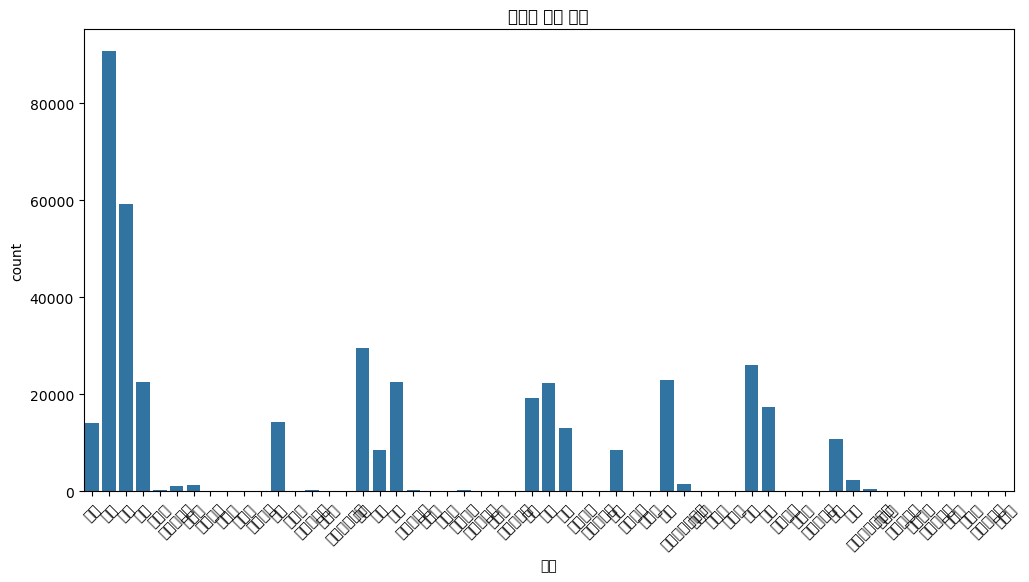

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\L

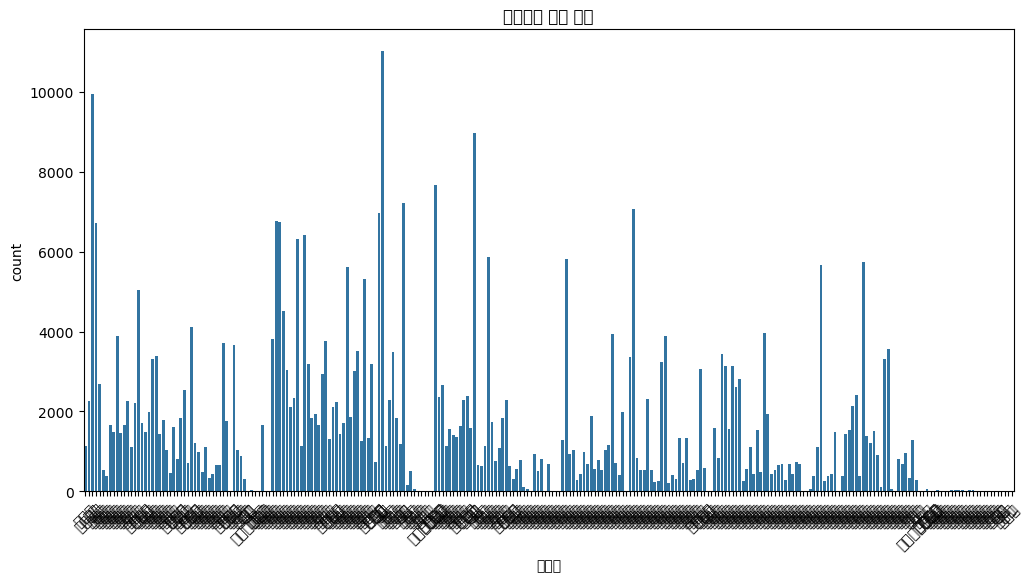

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\L

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
file_path = r'D:\시설\유지\24년12월유지주소분리_결과.cs'

# 여러 인코딩 시도 (euc-kr, utf-8, ISO-8859-1)
encodings = ['euc-kr', 'utf-8', 'ISO-8859-1']
df = None

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"파일을 {encoding} 인코딩으로 성공적으로 읽었습니다.")
        break
    except UnicodeDecodeError:
        print(f"{encoding} 인코딩으로 파일을 읽을 수 없습니다.")

# 인코딩 실패 시 바이너리 모드로 읽기
if df is None:
    print("모든 인코딩 방법이 실패하여 바이너리 모드로 파일을 처리합니다.")
    with open(file_path, 'rb') as f:
        content = f.read()  # 바이너리 모드로 읽어옴
    print(content[:500])  # 첫 500바이트를 출력해봐서 데이터 확인 (가장 앞부분만 출력)

# 데이터가 읽혔다면 EDA 실행
if df is not None:
    # 1. 데이터 구조 확인
    print("데이터 구조 확인:")
    print(df.info())

    # 2. 데이터의 기본 통계적 요약
    print("\n기본 통계적 요약:")
    print(df.describe())

    # 3. 결측치 확인
    print("\n결측치 확인:")
    print(df.isnull().sum())

    # 4. 시각화 - 변수 간 관계 탐색
    # 시도, 시군구, 읍면동 등 카테고리 변수에 대한 분포를 확인
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='시도')
    plt.title('시도별 주소 분포')
    plt.xticks(rotation=45)
    plt.show()

    # 시군구별 분포 확인
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='시군구')
    plt.title('시군구별 주소 분포')
    plt.xticks(rotation=45)
    plt.show()

    # 연속형 변수의 경우 히스토그램을 사용하여 분포를 확인
    # 예를 들어 '리', '산' 등의 변수에 대해
    plt.figure(figsize=(12, 6))
    df['리'].value_counts().plot(kind='bar')
    plt.title('리별 주소 분포')
    plt.show()

    # 상관 관계를 확인하고 히트맵을 출력 (연속형 변수들만)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('상관 관계 히트맵')
    plt.show()
else:
    print("파일을 읽을 수 없습니다.")

In [11]:
import pandas as pd
import openpyxl
from openpyxl.styles import Font
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
file_path = r'D:\시설\유지\24년12월유지주소분리.cs'

# 여러 인코딩 시도 (euc-kr, utf-8, ISO-8859-1)
encodings = ['euc-kr', 'utf-8', 'ISO-8859-1']
df = None

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"파일을 {encoding} 인코딩으로 성공적으로 읽었습니다.")
        break
    except UnicodeDecodeError:
        print(f"{encoding} 인코딩으로 파일을 읽을 수 없습니다.")

# EDA 수행
if df is not None:
    # 데이터 구조 확인
    print("데이터 구조 확인:")
    print(df.info())

    # 데이터의 기본 통계적 요약
    print("\n기본 통계적 요약:")
    print(df.describe())

    # 결측치 확인
    print("\n결측치 확인:")
    print(df.isnull().sum())

    # 시각화 - 변수 간 관계 탐색
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='시도')
    plt.title('시도별 주소 분포')
    plt.xticks(rotation=45)
    plt.show()

    # 시군구별 분포 확인
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='시군구')
    plt.title('시군구별 주소 분포')
    plt.xticks(rotation=45)
    plt.show()

    # 연속형 변수의 경우 히스토그램을 사용하여 분포를 확인
    plt.figure(figsize=(12, 6))
    df['리'].value_counts().plot(kind='bar')
    plt.title('리별 주소 분포')
    plt.show()

    # 상관 관계를 확인하고 히트맵을 출력 (연속형 변수들만)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('상관 관계 히트맵')
    plt.show()

    # 엑셀로 저장 (openpyxl을 사용하여 한글 폰트 적용)
    output_file_path = r'D:\시설\유지\24년12월유지주소분리_결과_with_font.xlsx'
   
    # pandas로 엑셀로 저장 (기본 저장)
    df.to_excel(output_file_path, index=False, engine='openpyxl')
   
    # openpyxl을 사용해 한글 폰트 적용
    wb = openpyxl.load_workbook(output_file_path)
    sheet = wb.active

    # 한글 폰트 설정 (Windows의 경우 Malgun Gothic 사용)
    font = Font(name='Malgun Gothic', size=12)
   
    # 시트의 모든 셀에 한글 폰트 적용
    for row in sheet.iter_rows():
        for cell in row:
            cell.font = font

    # 수정된 엑셀 파일 저장
    wb.save(output_file_path)

    print(f"결과를 {output_file_path}에 저장하였습니다.")
else:
    print("파일을 읽을 수 없습니다.")

euc-kr 인코딩으로 파일을 읽을 수 없습니다.
utf-8 인코딩으로 파일을 읽을 수 없습니다.
파일을 ISO-8859-1 인코딩으로 성공적으로 읽었습니다.
데이터 구조 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411232 entries, 0 to 411231
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ¼³Ä¡ÁÖ¼Ò      411232 non-null  object
 1   ¿µ¾÷±¸¿ªÁ¤º¸  411111 non-null  object
dtypes: object(2)
memory usage: 6.3+ MB
None

기본 통계적 요약:
                            ¼³Ä¡ÁÖ¼Ò ¿µ¾÷±¸¿ªÁ¤º¸
count                         411232       411111
unique                        400800          254
top     °æ±â µ¿µÎÃµ½Ã µ¿µÎÃµµ¿ 352-2      M000305
freq                              48         5780

결측치 확인:
¼³Ä¡ÁÖ¼Ò          0
¿µ¾÷±¸¿ªÁ¤º¸    121
dtype: int64


ValueError: Could not interpret value `시도` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>